# lab8

 1. Виконати вирішення задачі класифікації для 3 класів з набору даних food101 
 2. Індекси класів визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 (де і1,і2,і3 - індекс класу (починаючи з 0) у відсортованому за алфавітом наборі даних, n - номер за списком.
3. Отримані результати викласти на github у репозиторій в основну (default) гілку в папці Lab8.



In [5]:
import os

for dirpath, dirnames, filenames in os.walk("lab8data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


  

There are 2 directories and 0 images in 'lab8data'.
There are 3 directories and 0 images in 'lab8data\test'.
There are 0 directories and 250 images in 'lab8data\test\cheese_plate'.
There are 0 directories and 250 images in 'lab8data\test\garlic_bread'.
There are 0 directories and 250 images in 'lab8data\test\pizza'.
There are 3 directories and 0 images in 'lab8data\train'.
There are 0 directories and 75 images in 'lab8data\train\cheese_plate'.
There are 0 directories and 75 images in 'lab8data\train\garlic_bread'.
There are 0 directories and 75 images in 'lab8data\train\pizza'.


In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path("lab8data/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['cheese_plate' 'garlic_bread' 'pizza']


Image shape: (512, 512, 3)


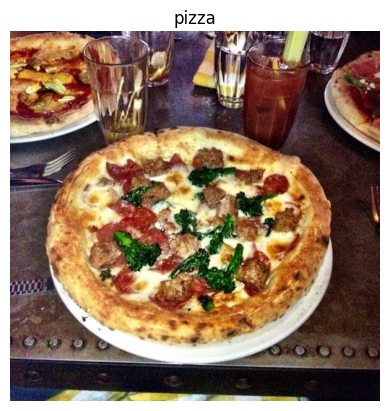

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

img = view_random_image(target_dir="lab8data/train/",
                        target_class="pizza")


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# Set the seed
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "lab8data/train/"
test_dir = "lab8data/test/"


train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=5, 
                                               target_size=(224, 224), 
                                               class_mode="categorical")

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=5,
                                               target_size=(224, 224),
                                               class_mode="categorical")

model = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(3, activation='softmax') 
])

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(
    train_data,
    epochs=20,
    validation_data=valid_data
)

c:\Users\Назар\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 16s 285ms/step - accuracy: 0.3157 - loss: 1.2255 - val_accuracy: 0.2867 - val_loss: 1.0990
Epoch 2/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - accuracy: 0.2650 - loss: 1.1018 - val_accuracy: 0.3347 - val_loss: 1.0985
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 0.3460 - loss: 1.0978 - val_accuracy: 0.3360 - val_loss: 1.0901
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 251ms/step - accuracy: 0.3823 - loss: 1.0946 - val_accuracy: 0.4227 - val_loss: 1.0323
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.3230 - loss: 1.0942 - val_accuracy: 0.3333 - val_loss: 1.0988
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.2719 - loss: 1.0978 - val_accuracy: 0.3333 - val_loss: 1.0981
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 0.3544 - loss: 1.1020 - val_accuracy: 0.4400 - val_loss: 1.0854
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - accuracy: 0.4808 - loss: 1.0654 - val_accu